In [367]:
# Importing the necessary libraries
from shapely.geometry import Point
import matplotlib.pyplot as plt 
import plotly.express as px 
import missingno as msno
import geopandas as gpd
import seaborn as sns
import pandas as pd 
import numpy as np
import os 


In [368]:
# Importing the data and storing it in respective objects
# Parsing the dates in the Box Placement data during data retrieval to ensure accurate interpretation of date columns incase the dates are in a non-standard format in the dataset
# Parsing dates this early in the process will increase processing time and ensure consistency when handling dates
box_placement_data = pd.read_excel(r"Data_Analyst_Intern_Assessment_Test.xlsx",parse_dates = ["expected_harvest_date","planting_date"],sheet_name = "Box Placement")
wet_harvest_data   = pd.read_excel(r"Data_Analyst_Intern_Assessment_Test.xlsx",sheet_name = "Wet Harvest")
dry_harvest_data  = pd.read_excel(r"Data_Analyst_Intern_Assessment_Test.xlsx",sheet_name = "Dry Harvest")

* *Data Imported without issues*

In [369]:
# checking the top 5 rows of box_placement_data
box_placement_data = box_placement_data.copy()
box_placement_data.head()

,client_name,distance_to_water_body,enumerator_comment,expected_harvest_date,farmer_in_list_or_control,farmer_state_district,field_irrigated,insured_crop,intercropping,other_factors_that_affected_germination,...,herbicide_applied_box1,box1_cause_of_flood,box1_flood_occurence_date,box2_flood_occurence_date,other_causes_of_weeds_box1,other_causes_of_weeds_box2,latitude,longitude,altitude,accuracy
0,A,0-5KM,Done,2022-05-27,farmer_listed,Katsina,no,wheat,no,insufficient water for watering,...,NaN,NaN,NaT,NaT,NaN,NaN,11.367974,7.568032,717.83,6.16
1,A,More_than_5_KM,successfuly done,2022-05-27,control_farmer,Katsina,no,wheat,no,insufficient watering.,...,NaN,NaN,NaT,NaT,NaN,NaN,11.367970,7.567983,696.77,4.25
2,A,More_than_5_KM,ok,2022-06-08,control_farmer,Zamfara,no,wheat,no,rain,...,NaN,NaN,NaT,NaT,NaN,NaN,12.046592,6.640337,65.00,1.00
3,A,More_than_5_KM,ok,2022-06-06,control_farmer,Zamfara,no,wheat,no,soil factor,...,NaN,NaN,NaT,NaT,NaN,NaN,12.046592,6.640337,65.00,3.90
4,A,More_than_5_KM,ok,2022-06-16,control_farmer,Zamfara,no,wheat,no,soil factor,...,NaN,NaN,NaT,NaT,NaN,NaN,12.051899,6.640011,65.00,1.00


In [370]:
# checking the top 5 rows of wet_harvest_data
wet_harvest_data = wet_harvest_data.copy()
wet_harvest_data.head()

,@case_id,box1_harvest_possible,box2_harvest_possible,enumerator_comment,farmer_verified,box1_wet_weight,box1_wet_weight_confirmation,box2_wet_weight,box2_wet_weight_confirmation,timeEnd,...,box_2_non_compliance_confirmation,why_unable_to_capture_box2_weight,why_no_crop_survived_in_box1,why_no_crop_survived_in_box2,username,wet_harvest_comment,latitude,longitude,altitude,accuracy
0,9d1a878b-ea56-423a-83a5-dce4eee21302,yes,yes,ok,farmer_verified,3.375,3.375,3.250,3.250,2022-06-04T10:26:17.390000Z,...,NaN,NaN,NaN,NaN,nig040,ok,12.138754,6.686328,107.0,1.26
1,ebf9955c-d21e-434a-80d7-658a2cecd0bf,yes,yes,ok,farmer_verified,1.765,1.765,1.825,1.825,2022-06-04T10:13:45.347000Z,...,NaN,NaN,NaN,NaN,nig040,ok,12.138754,6.686328,107.0,1.22
2,eb5f0cf1-0814-48af-94be-62b5dc2524a9,yes,yes,ok,farmer_verified,2.920,2.920,2.835,2.835,2022-06-04T09:53:46.136000Z,...,NaN,NaN,NaN,NaN,nig040,ok,12.138754,6.686328,107.0,1.69
3,79880c35-bb12-4089-8f06-3927b6c44875,yes,yes,ok,farmer_verified,2.835,2.835,2.640,2.640,2022-06-04T09:23:13.166000Z,...,NaN,NaN,NaN,NaN,nig040,ok,12.138754,6.686328,107.0,1.64
4,5d8d55c6-9514-495f-a629-21fd17b92c77,yes,yes,ok,farmer_verified,3.215,3.215,3.315,3.315,2022-06-04T10:26:42.456000Z,...,NaN,NaN,NaN,NaN,nig040,ok,12.138754,6.686328,107.0,1.48


In [371]:
# checking the top 5 rows of dry_harvest_data
dry_harvest_data = dry_harvest_data.copy()
dry_harvest_data.head()

,@case_id,did_the_farmer_keep_the_crops_in_separate_bags,enumerator_comment,farmer_verified,box1_dry_weight,box1_dry_weight_confirmation,box2_dry_weight,box2_dry_weight_confirmation,was_anything_added_or_removed_from_the_harvest_bag,timeEnd,timeStart,cannot_proceed_with_dry_harvest,username,dry_harvest_comment,latitude,longitude,altitude,accuracy
0,9d1a878b-ea56-423a-83a5-dce4eee21302,yes,ok,farmer_verified,3.250,3.250,3.150,3.150,no,2022-06-04T10:29:47.353000Z,2022-06-04T10:26:43.768000Z,NaN,nig040,ok,12.138754,6.686328,107.0,1.27
1,ebf9955c-d21e-434a-80d7-658a2cecd0bf,yes,ok,farmer_verified,1.660,1.660,1.735,1.735,no,2022-06-04T10:21:12.662000Z,2022-06-04T10:13:51.524000Z,NaN,nig040,ok,12.138754,6.686328,107.0,1.57
2,eb5f0cf1-0814-48af-94be-62b5dc2524a9,yes,ok,farmer_verified,2.805,2.805,2.770,2.770,no,2022-06-04T09:56:59.356000Z,2022-06-04T09:53:54.372000Z,NaN,nig040,ok,12.138754,6.686328,107.0,1.24
3,79880c35-bb12-4089-8f06-3927b6c44875,yes,ok,farmer_verified,2.750,2.750,2.585,2.585,no,2022-06-04T09:27:22.475000Z,2022-06-04T09:24:26.672000Z,NaN,nig040,ok,12.138754,6.686328,107.0,1.63
4,5d8d55c6-9514-495f-a629-21fd17b92c77,yes,ok,farmer_verified,3.060,3.060,3.100,3.100,no,2022-06-04T10:31:01.110000Z,2022-06-04T10:26:57.149000Z,NaN,nig040,ok,12.138754,6.686328,107.0,1.69


# Tasks

# 1. Merging the Forms On @case_id

In [372]:
# First merge with wet_harvest_data
enumeration_data = pd.merge(box_placement_data, wet_harvest_data, on = "@case_id",suffixes = ('', '_wet'))

# Second merge with dry_harvest_data
enumeration_data = pd.merge(enumeration_data, dry_harvest_data, on = "@case_id", suffixes=('', '_dry'))
enumeration_data.head() 

,client_name,distance_to_water_body,enumerator_comment,expected_harvest_date,farmer_in_list_or_control,farmer_state_district,field_irrigated,insured_crop,intercropping,other_factors_that_affected_germination,...,was_anything_added_or_removed_from_the_harvest_bag,timeEnd_dry,timeStart_dry,cannot_proceed_with_dry_harvest,username_dry,dry_harvest_comment,latitude_dry,longitude_dry,altitude_dry,accuracy_dry
0,A,More_than_5_KM,successfuly done,2022-05-27,control_farmer,Katsina,no,wheat,no,insufficient watering.,...,no,2022-05-27T11:09:45.357000Z,2022-05-27T10:56:36.195000Z,NaN,nig187,Done,11.368059,7.568079,721.23,8.00
1,A,More_than_5_KM,ok,2022-06-08,control_farmer,Zamfara,no,wheat,no,rain,...,no,2022-06-01T11:25:45.374000Z,2022-06-01T11:18:01.603000Z,NaN,nig040,ok,12.147570,6.714653,107.00,1.49
2,A,More_than_5_KM,ok,2022-06-06,control_farmer,Zamfara,no,wheat,no,soil factor,...,no,2022-06-01T10:41:21.419000Z,2022-06-01T10:36:22.089000Z,NaN,nig040,ok,12.138754,6.686328,107.00,1.47
3,A,More_than_5_KM,ok,2022-06-16,control_farmer,Zamfara,no,wheat,no,soil factor,...,no,2022-06-01T09:51:49.265000Z,2022-06-01T09:46:32.212000Z,NaN,nig040,ok,12.138754,6.686328,107.00,1.48
4,A,More_than_5_KM,ok,2022-06-13,control_farmer,Zamfara,no,wheat,no,rain,...,no,2022-06-03T10:33:21.682000Z,2022-06-03T10:29:05.155000Z,NaN,nig040,ok,12.162289,6.660421,107.00,1.38


* *using suffixes=('', '_wet') in the first merge to specify an empty suffix for the columns from box_placement_data and a _wet suffix for the columns from wet_harvest_data.*
* *Using suffixes=('', '_dry') in hthe second merge to specify an empty suffix for the columns carried forward from the previous merge and a _dry suffix for the columns from dry_harvest_data.*
- **Adding suffixes to ensure that pandas renames columns in a way that makes sense**

#### Data Cleaning and Exploration

In [373]:

# Checking Orientation of the data 
enumeration_data.shape

(2187, 121)

In [374]:
#Checking for Missing values in the data
enumeration_data.isnull().sum()

client_name                                                            0
distance_to_water_body                                                37
enumerator_comment                                                     0
expected_harvest_date                                                 37
farmer_in_list_or_control                                              0
farmer_state_district                                                  0
field_irrigated                                                       37
insured_crop                                                           0
intercropping                                                          0
other_factors_that_affected_germination                             2092
planting_date                                                          0
success_box1                                                           0
success_box2                                                          37
ward_lga_subcounty_camp                            

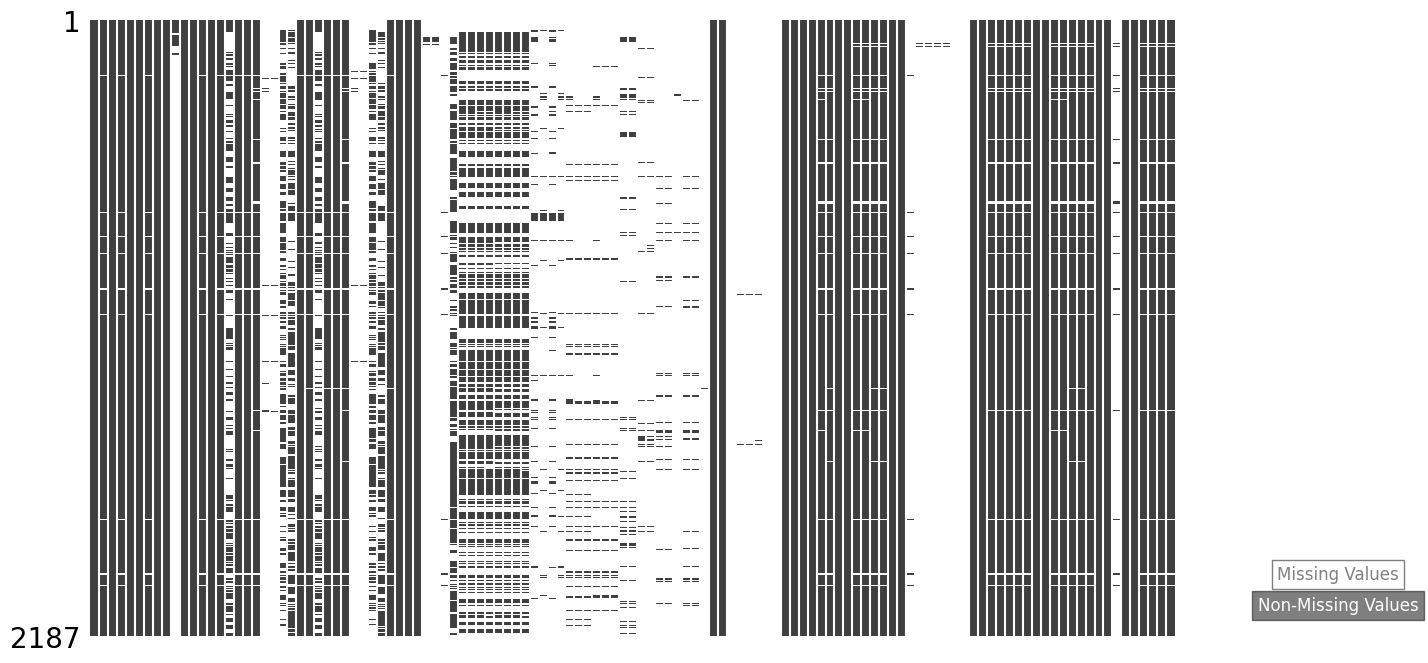

In [375]:
# Visualizing missing values
fig, ax = plt.subplots(figsize=(14, 8))
msno.matrix(enumeration_data,ax = ax,sparkline = False)
plt.text(1.15, 0.05, 'Non-Missing Values', color = 'white', ha ='center', va = 'center', transform = ax.transAxes, fontsize = 12, bbox = dict(facecolor= 'black', alpha = 0.5))
plt.text(1.15, 0.1, 'Missing Values', color = 'grey', ha='center', va = 'center', transform = ax.transAxes, fontsize = 12, bbox = dict(facecolor = 'white', alpha = 0.5))
plt.show()

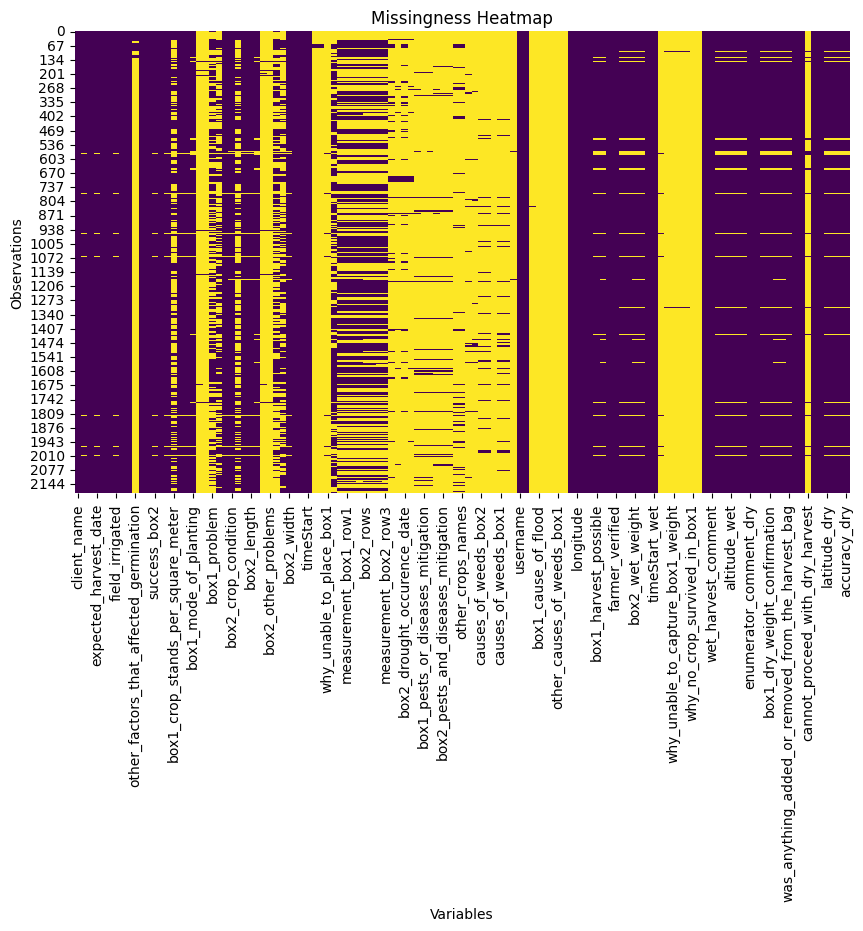

In [376]:
# Checking whether the missingness in the data is occuring at random or not
plt.figure(figsize = (10, 6))
sns.heatmap(enumeration_data.isnull(), cmap = 'viridis', cbar = False)
plt.title('Missingness Heatmap')
plt.xlabel('Variables')
plt.ylabel('Observations')
plt.show()

* *There is no pattern to the missingness of the data, this means that the **Missingness is Occuring at Random (MAR)**.*

### Dropping columns with significant missing data and further data cleanup

* *Dropping columns with 75% missing entries since it does not have sufficient data integrity and imputing them might therefore introduce unnecesary noise to the data*

In [377]:
# Defining a threshold for missing values and Dropping columns with more than 75% missing values
missing_threshold = 0.75 

# Calculating  the percentage of missing values for each column
missing_percentage = (enumeration_data.isnull().sum() / len(enumeration_data)).sort_values(ascending = False)

# Identifying columns to drop based on the threshold
columns_to_drop = missing_percentage[missing_percentage > missing_threshold].index

# Dropping columns with a high percentage of missing values
enumeration_data.drop(columns = columns_to_drop, inplace = True)

In [378]:
# Checking the orientation of the remaining columns after dropping the columns with more than 75 % missing entries
enumeration_data.shape

(2187, 79)

In [379]:
enumeration_data.isnull().sum() 

client_name                                              0
distance_to_water_body                                  37
enumerator_comment                                       0
expected_harvest_date                                   37
farmer_in_list_or_control                                0
farmer_state_district                                    0
field_irrigated                                         37
insured_crop                                             0
intercropping                                            0
planting_date                                            0
success_box1                                             0
success_box2                                            37
ward_lga_subcounty_camp                                  0
box1_crop_condition                                     37
box1_crop_stands_per_square_meter                     1266
box1_dim_8_by_5                                         37
box1_length                                             

In [380]:
# Imputing the following columns with means since they have entries which are consistent
columns_to_be_impute_with_mean = ['box1_dry_weight','box1_wet_weight','box2_dry_weight_confirmation','box1_dry_weight_confirmation','box1_crop_stands_per_square_meter','box2_crop_stands_per_square_meter']

# Calculating mean of each column
means_calculated = enumeration_data[columns_to_be_impute_with_mean].mean()

# Imputing missing values with mean
enumeration_data[columns_to_be_impute_with_mean] = enumeration_data[columns_to_be_impute_with_mean].fillna(means_calculated)

In [381]:
# Imputing the remaining missing entries with "Unknown"
columns_to_be_imputed = [
    'distance_to_water_body','expected_harvest_date', 'field_irrigated','success_box2','box1_crop_condition',
    'box1_crop_stands_per_square_meter', 'box1_dim_8_by_5','box1_length', 'box2_length', 'box1_width',
    'box1_mode_of_planting', 'box1_problem', 'box1_secondary_issues','box2_crop_condition','box2_width',
    'box2_crop_stands_per_square_meter','box2_dim_8_by_5', 'box2_mode_of_planting', 'box2_problem',
    'box2_secondary_issues', '@case_id','type_of_irrigation_system', 'box1_rows','measurement_box1_row1',
    'measurement_box1_row2', 'measurement_box1_row3', 'box2_rows','measurement_box2_row1', 'measurement_box2_row2',
    'measurement_box2_row3','username','box1_harvest_possible','box2_harvest_possible','enumerator_comment_wet',
    'farmer_verified', 'box1_wet_weight', 'box1_wet_weight_confirmation','box2_wet_weight', 'box2_wet_weight_confirmation',
    'wet_harvest_comment', 'accuracy_wet','did_the_farmer_keep_the_crops_in_separate_bags','enumerator_comment_dry',
    'farmer_verified_dry','box1_dry_weight', 'box1_dry_weight_confirmation','box2_dry_weight','box2_dry_weight_confirmation',
    'was_anything_added_or_removed_from_the_harvest_bag', 'username_dry', 'dry_harvest_comment', 'accuracy_dry'
]

# Imputing missing values with "Unknown" in selected columns
enumeration_data[columns_to_be_imputed] = enumeration_data[columns_to_be_imputed].fillna("Unknown")

In [382]:
# Checking to see the columns which have not been imputed
missing_columns = enumeration_data.columns[enumeration_data.isnull().any()]
print("Columns with missing values:")
for column in missing_columns:
    print(column)

Columns with missing values:
latitude_wet
longitude_wet
altitude_wet
latitude_dry
longitude_dry
altitude_dry


* *I have left the geographic position data intentionally un_imputed in order to prioritize data integrity and avoid errors in subsequent analyses*

# 2. Identifying Enumerators with Potentially Incorrect Data

In [383]:
# Unifying all the naming conventions to lower characters to ensure code consistency and maintainability:
enumeration_data.columns = enumeration_data.columns.str.lower()

### 1. Crazy box Dimensions

<Axes: >

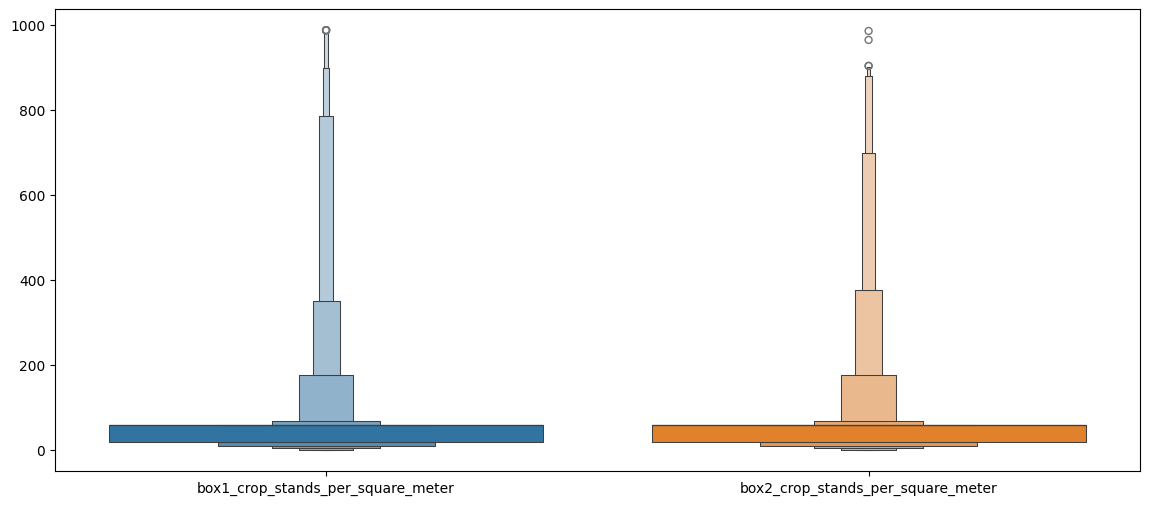

In [384]:
# Visualizing potential outliers in relevant dimension features using boxen plots
plt.figure(figsize=(14, 6))

sns.boxenplot(data = enumeration_data
              [['box1_crop_stands_per_square_meter','box2_crop_stands_per_square_meter']])

* *Clearly there are outliers in the box1_crop_stands_per_square_meter and box2_crop_stands_per_square_meter this shows that the enumerators might have included faulty data*

In [385]:
# Showing entries with inconsistent dimensions 
# Calculating quartiles and IQR for each column
Q1 = enumeration_data['box1_crop_stands_per_square_meter'].quantile(0.25)
Q3 = enumeration_data['box1_crop_stands_per_square_meter'].quantile(0.75)
IQR = Q3 - Q1

# Determining outliers for box1_crop_stands_per_square_meter
outliers_box1 = enumeration_data[(enumeration_data['box1_crop_stands_per_square_meter'] < (Q1 - 1.5 * IQR)) | 
                                 (enumeration_data['box1_crop_stands_per_square_meter'] > (Q3 + 1.5 * IQR))]
outlier_entries = enumeration_data.loc[outliers_box1.index, 'username']
print("The enumerators who entered inconsistent data are:")
print(outlier_entries)

The enumerators who entered inconsistent data are:
21      nig190
152     nig190
153     nig190
195     nig137
196     nig137
198     nig137
199     nig137
200     nig137
201     nig137
202     nig137
203     nig137
204     nig137
205     nig137
254     nig184
255     nig184
256     nig184
257     nig184
258     nig184
259     nig184
354     nig184
355     nig184
356     nig184
357     nig184
358     nig184
359     nig184
360     nig184
361     nig184
362     nig184
365     nig184
421     nig118
422     nig118
485     nig118
486     nig118
487     nig118
488     nig118
491     nig118
492     nig118
493     nig118
494     nig118
557     nig118
558     nig118
559     nig118
560     nig118
561     nig118
562     nig118
563     nig118
564     nig118
565     nig118
566     nig118
567     nig118
595     nig118
596     nig118
597     nig118
598     nig118
599     nig118
600     nig118
601     nig118
602     nig118
603     nig118
672     nig020
673     nig020
674     nig020
675     nig020
676 

###  2. False zero yields

In [386]:
# To get this we will have to check the enumerator_comment against the comment recorded on harvesting(harvest_comment) to see if there is a ...
#... mismatch between what was reported and what was actually harvested
comparison = enumeration_data['enumerator_comment_wet'] == enumeration_data['wet_harvest_comment']
    
# Check if there are mismatches
if comparison.all():
    print("There is no mismatch between the two columns.")
else:
    print("There is a mismatch between the two columns.")


There is no mismatch between the two columns.


- The reason for choosing enumerator_comment and harvest_comment is that it has the we intending on getting (**'yields'**)
* *The false zero yield does not show any inconsistency*

### 3. Dry weight exceeding wet weight

In [387]:
# Here the focus is on the box1_wet_weight and box1_dry_weight columns of the data since were the weights recorded by the enumerators
# Initializing an empty list that will store the usernames with inconsistencies
inconsistent_usernames = []

# Iterating over rows in the DataFrame
for index, row in enumeration_data.iterrows():
    dry_weight = row['box1_dry_weight']
    wet_weight = row['box1_wet_weight']
    
    # Retrieving the username
    username = row['username']  
    if dry_weight > wet_weight:
        inconsistent_usernames.append(username)
if inconsistent_usernames:
    print("Usernames with Inconsistencies in Their Data Entry:")
    print(", ".join(inconsistent_usernames))
else:
    print("No inconsistencies found")

Usernames with Inconsistencies in Their Data Entry:
nig039, nig188, nig108, nig187, nig187, nig187, nig044, nig099, nig099, nig075, nig075, nig099, nig099, nig099, nig099, nig099, nig099, nig099, nig099, nig099, nig037, nig048, nig106, nig106, nig106, nig106, nig106, nig106, nig106, nig111, nig099, nig111, nig185, nig098, nig168, nig168, nig168, nig098, nig098, nig098, nig090, nig090, nig090, nig102, nig102, nig090, nig105, nig100, nig120, nig105, nig090, nig097, nig097, nig097, nig097, nig174, nig098, nig098, nig098, nig097, nig174, nig174, nig137, nig104, nig103, nig132, nig132, nig028, nig028, nig030, nig026, nig033, nig026, nig033, nig034, nig031, nig026, nig031, nig031, nig030


### 4. Non-compliant data sets

##### a.   *No dimensions yet there is yield data captured*

In [388]:

# Defining a list of values considered as no yield or no crop
zero_yield_entries = ['No Yield', 'No Crop', 'no harvest', 'No crop harvested', 'Zero Yield']

# Checking for NaN values in 'box1_length' or 'box1_width' columns to get entries with no dimensions
mask_nan_box1 = enumeration_data['box1_length'].isna() | enumeration_data['box1_width'].isna()

# Checking for NaN values in 'box2_length' or 'box2_width' columns to get entries with no dimensions
mask_nan_box2 = enumeration_data['box2_length'].isna() | enumeration_data['box2_width'].isna()

# Combining the boolean masks to identify rows with NaN in either box1 or box2 dimensions
mask_nan_dimensions = mask_nan_box1 | mask_nan_box2

# Checking consistency of yield based on the conditions
enumeration_data['dimension_yield_consistency'] = 'consistent' 

# If we have NaN in the dimensions, we need to check corresponding yield for inconsistency
enumeration_data.loc[mask_nan_dimensions, 'dimension_yield_consistency'] = 'inconsistent'

# Checking the yield values against no_yield_values for inconsistency
mask_inconsistent_yield = enumeration_data['enumerator_comment_dry'].isin(zero_yield_entries)
enumeration_data.loc[mask_inconsistent_yield, 'dimension_yield_consistency'] = 'inconsistent'
enumeration_data.dimension_yield_consistency.unique()


array(['consistent', 'inconsistent'], dtype=object)

* *There are some inconsistent entries this means that we have entries with no dimensions but give some yields: this shows Non-compliant data*

##### b.   *Zero Wet Weight Yield but Greater than Zero dry Weight*

In [389]:
# Defining a list of values considered as no yield or no crop in dry weight
no_yield_dry_values = ['ni harvest','No crop' 'No crop harvested.Crop was loss due to late planting,insects and rodents',
                       'no crop servived', 'no crops servived','no crops servived.','no harvest','zero harvest','No Yield',
                       'No Yield', 'ZERO YEILD DUE TO PEST INFESTATION']

# Defining a list of values considered as no yield or no crop in wet weight
no_yield_wet_values = ['Zero Yield', 'No Crop','Nk crop servied','No crop harvested', 'No Yield','no crop servied','no crops servived',
                       'no crop servived let crop','no crop servived let olanting','no crop servived let Plantng','No crop Survied',
                       'No crop Survived', 'No Yield', 'nothing to harvest','zero harvest','ZERO HARVEST DUE TO PEST INFESTATION',
                       'ZERO YIELD DUE TO PEST INFESTATION','ZERO YEILD DUE TO PEST INFESTATION'
                       ]

# Checking for inconsistency based on wet_weight_yield and dry_weight
mask_inconsistent = (
    (enumeration_data['enumerator_comment_wet'].isin(no_yield_wet_values)) &
    (~enumeration_data['enumerator_comment_dry'].isin(no_yield_dry_values))
)

# Initializing consistency column the assumption here is that all rows are consistent
enumeration_data['wet_and_dry_weight_consistency'] = 'consistent'

# Updating consistency column based on inconsistency condition
enumeration_data.loc[mask_inconsistent, 'wet_and_dry_weight_consistency'] = 'inconsistent'
enumeration_data.wet_and_dry_weight_consistency.unique()


array(['consistent', 'inconsistent'], dtype=object)

* *There are some inconsistent entries in the column wet_and_dry_weight_consistency this means that we have entries with zero wet weight yields but have some yields in the dry weight section: this shows Non-compliant data*

### 5. Other Variables that may explain funny results

In [390]:
# Some Other variables which might show some inconsistent results are: box weight recorded vs box weight confirmation
# Checking for mismatches between box1_wet_weight and box1_wet_weight_confirmation
enumeration_data['weight_match'] = (enumeration_data['box1_wet_weight'] == enumeration_data['box1_wet_weight_confirmation'])

# Identifying rows with mismatched confirmation
mismatched_rows = enumeration_data[enumeration_data['weight_match'] == False]

# Getting usernames corresponding to mismatched entries
mismatched_usernames = mismatched_rows['username']

# Displaying usernames with mismatches
if not mismatched_usernames.empty:
    unique_usernames_with_mismatches = mismatched_usernames.unique()
    print("These are the Usernames associated with mismatches entries:")
    for username in unique_usernames_with_mismatches:
        print(username)
else:
    print("There are no mismatched entries found.")

These are the Usernames associated with mismatches entries:
nig187
nig109
nig168
nig188
nig137
nig114
nig043
nig148
nig118
nig186
nig174
nig175
nig022
nig178
nig103
nig033
nig024
nig035
nig021


# 3. Spacial Distribution of Data Points

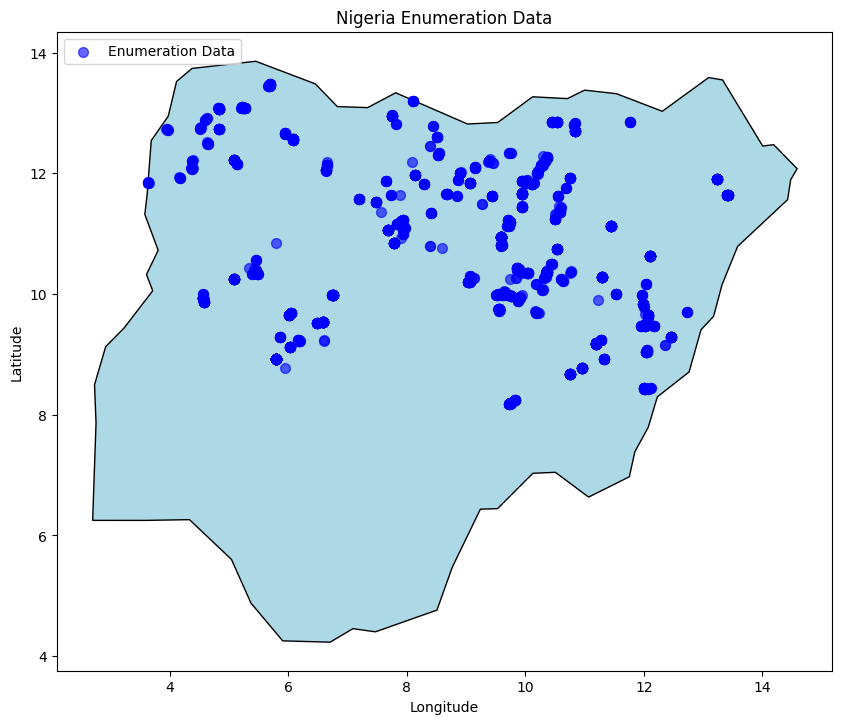

In [391]:
import warnings

# Suppressing FutureWarning related to geopandas.datasets
warnings.simplefilter(action = 'ignore', category = FutureWarning)

# Creating a GeoDataFrame with Point geometries
geometry = [Point(xy) for xy in zip(enumeration_data['longitude'], enumeration_data['latitude'])]
crs = 'EPSG:4326' # setting the coordinates reference system  to 'EPSG:4326', which corresponds to WGS84 geographic coordinates (latitude and longitude)
gdf = gpd.GeoDataFrame(enumeration_data, geometry = geometry, crs = crs)

# Loading the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtering world map to only include our country of focus Nigeria
Nigeria = world[world['name'] == 'Nigeria']

# Plotting Nigeria Map
fig, ax = plt.subplots(figsize = (10, 10))
Nigeria.plot(ax = ax, color = 'lightblue', edgecolor = 'black')

# Plotting enumeration data points on map
gdf.plot(ax = ax, color = 'blue', markersize = 50, alpha = 0.6, label = 'Enumeration Data')
ax.set_title('Nigeria Enumeration Data')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend(loc = 'upper left')
plt.show()

# 4. Computing Average Yield per Hectare

In [392]:
# Convert the length and width columns with "Unknowns" to numeric, Forcing the errors to NaN
numeric_columns = ['box1_dry_weight_confirmation', 'box2_dry_weight_confirmation', 'box1_length', 'box1_width']
enumeration_data[numeric_columns] = enumeration_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Droping rows with NaN values in the selected columns
enumeration_data.dropna(subset=numeric_columns, inplace=True)

# average dry weight in metric tonnes
enumeration_data['avg_dry_weight'] = (enumeration_data['box1_dry_weight_confirmation'] + enumeration_data['box2_dry_weight_confirmation']) / 2 / 1000 

# the area covered by box 1 in hectares
enumeration_data['box1_area_hectares'] = enumeration_data['box1_length'] * enumeration_data['box1_width'] / 10000

# The yield per hectare is
enumeration_data['yield_per_hectare'] = enumeration_data['avg_dry_weight'] / enumeration_data['box1_area_hectares']
enumeration_data.head()


,client_name,distance_to_water_body,enumerator_comment,expected_harvest_date,farmer_in_list_or_control,farmer_state_district,field_irrigated,insured_crop,intercropping,planting_date,...,latitude_dry,longitude_dry,altitude_dry,accuracy_dry,dimension_yield_consistency,wet_and_dry_weight_consistency,weight_match,avg_dry_weight,box1_area_hectares,yield_per_hectare
0,A,More_than_5_KM,successfuly done,2022-05-27 00:00:00,control_farmer,Katsina,no,wheat,no,2022-02-10,...,11.368059,7.568079,721.23,8.0,consistent,consistent,True,0.004695,0.004,1.173750
1,A,More_than_5_KM,ok,2022-06-08 00:00:00,control_farmer,Zamfara,no,wheat,no,2022-01-15,...,12.147570,6.714653,107.00,1.49,consistent,consistent,True,0.002705,0.004,0.676250
2,A,More_than_5_KM,ok,2022-06-06 00:00:00,control_farmer,Zamfara,no,wheat,no,2022-01-15,...,12.138754,6.686328,107.00,1.47,consistent,consistent,True,0.002352,0.004,0.588125
3,A,More_than_5_KM,ok,2022-06-16 00:00:00,control_farmer,Zamfara,no,wheat,no,2022-01-18,...,12.138754,6.686328,107.00,1.48,consistent,consistent,True,0.003145,0.004,0.786250
4,A,More_than_5_KM,ok,2022-06-13 00:00:00,control_farmer,Zamfara,no,wheat,no,2022-01-12,...,12.162289,6.660421,107.00,1.38,consistent,consistent,True,0.002338,0.004,0.584375


# 5. Yields to be considered Outliers/Erroneous

In [393]:
# We will need the entry of the column to show if the yield is Nornal or Outlier
# Defining a function to determine if an observation is Normal or Outlier
def error_detector(row):
    if row['box1_wet_weight'] != row['box1_wet_weight_confirmation']:
        return 'Erroneous_entry'
    else:
        return 'Correct_entry'
enumeration_data['yield_status'] = enumeration_data.apply(error_detector, axis = 1)
enumeration_data.yield_status.unique()

array(['Correct_entry', 'Erroneous_entry'], dtype=object)

- There are some yields flagged as erroneos

# 6. Problems affecting the crops per district

In [394]:
# Grouping by 'district' and the count occurrences of each problem
pd.set_option('display.max_rows', None)

problem_counts = enumeration_data.groupby('farmer_state_district')['box1_problem'].value_counts()
problem_counts

farmer_state_district  box1_problem                                                                                                     
Abia                   Unknown                                                                                                                1
Adamawa                Unknown                                                                                                               56
                       late_planting                                                                                                         35
                       poor_germination                                                                                                      22
                       drought                                                                                                               11
                       poor_germination late_planting                                                                                         9

# 7.  Supervisors Report 

## This will be in a Word(and pdf) Document which will have a link to my Github where this project will be housed

In [401]:
# Average yield per hectare in Metric Tonnes as requested
# Calculating the average yield per hectare
avg_yield_per_hectare = enumeration_data['yield_per_hectare'].mean()
avg_yield_per_hectare

1.0434495204275063

# The Answer to the Objective is:

In [409]:
# The average yield per hectare per district
aggregated_district_data = enumeration_data.groupby('farmer_state_district')['yield_per_hectare'].mean().reset_index()
aggregated_district_data

,farmer_state_district,yield_per_hectare
0,Abia,0.675000
1,Adamawa,0.780557
2,Bauchi,1.288172
3,Borno,0.590725
4,Gombe,1.997719
5,Jigawa,1.282877
6,Kaduna,1.991586
7,Kano,1.508676
8,Katsina,0.730442
9,Kebbi,1.324458


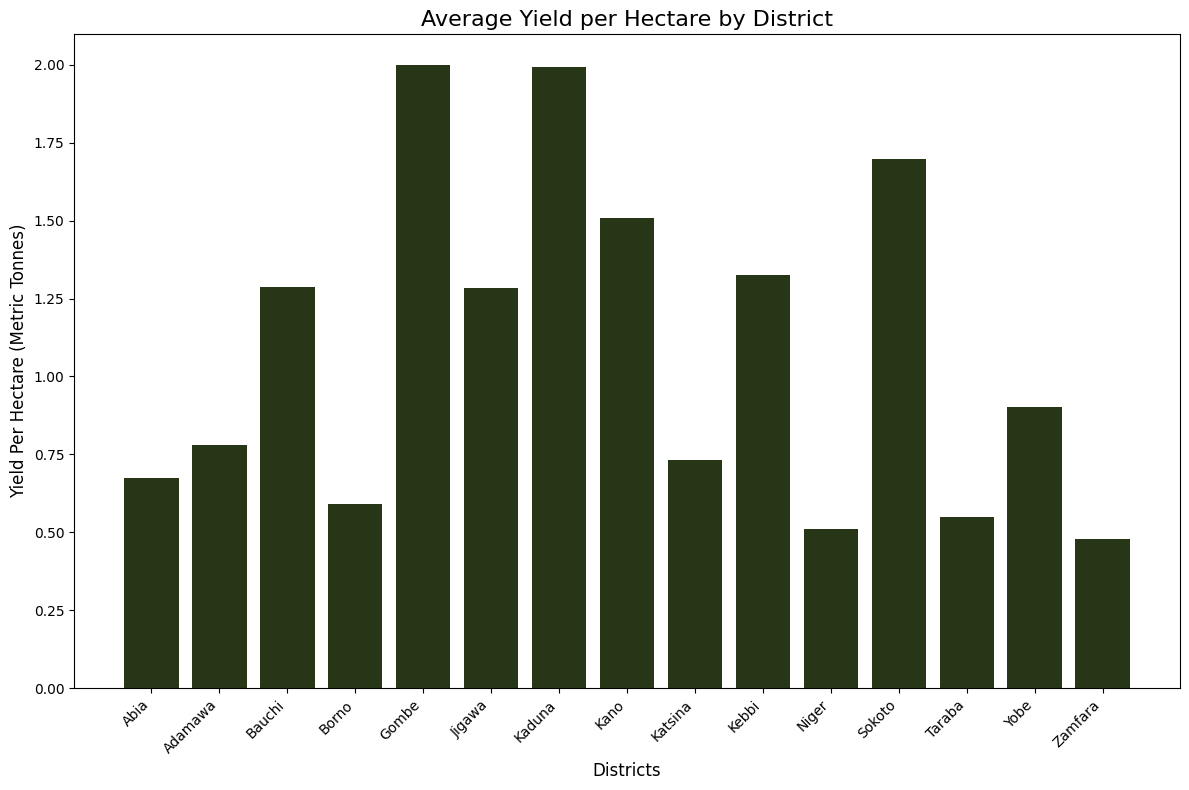

In [415]:
# Setting the figure size
plt.figure(figsize=(12, 8))

# Ploting a bar graph to show this
plt.bar(aggregated_district_data['farmer_state_district'], aggregated_district_data['yield_per_hectare'], color = ('#283618'))#color='skyblue')
plt.title('Average Yield per Hectare by District', fontsize=16)
plt.xlabel('Districts', fontsize=12)
plt.ylabel('Yield Per Hectare (Metric Tonnes)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [395]:
enumeration_data.columns

Index(['client_name', 'distance_to_water_body', 'enumerator_comment',
       'expected_harvest_date', 'farmer_in_list_or_control',
       'farmer_state_district', 'field_irrigated', 'insured_crop',
       'intercropping', 'planting_date', 'success_box1', 'success_box2',
       'ward_lga_subcounty_camp', 'box1_crop_condition',
       'box1_crop_stands_per_square_meter', 'box1_dim_8_by_5', 'box1_length',
       'box1_mode_of_planting', 'box1_problem', 'box1_secondary_issues',
       'box1_width', 'box2_crop_condition',
       'box2_crop_stands_per_square_meter', 'box2_dim_8_by_5', 'box2_length',
       'box2_mode_of_planting', 'box2_problem', 'box2_secondary_issues',
       'box2_width', '@case_id', 'timeend', 'timestart',
       'type_of_irrigation_system', 'box1_rows', 'measurement_box1_row1',
       'measurement_box1_row2', 'measurement_box1_row3', 'box2_rows',
       'measurement_box2_row1', 'measurement_box2_row2',
       'measurement_box2_row3', 'username', 'box_placement_comment',

### Exporting The Processed/Wrangled Data For Further Visualization and Report Building In Bi Tools(Power Bi/Tableau/QuickSight)

In [396]:
enumeration_data[['client_name', 'distance_to_water_body', 'enumerator_comment',
       'expected_harvest_date', 'farmer_in_list_or_control','farmer_state_district', 'field_irrigated', 'insured_crop','intercropping', 'planting_date', 'success_box1', 'success_box2',
       'ward_lga_subcounty_camp', 'box1_crop_condition','box1_crop_stands_per_square_meter', 'box1_dim_8_by_5', 'box1_length','box1_mode_of_planting', 'box1_problem', 'box1_secondary_issues',
       'box1_width', 'box2_crop_condition','box2_crop_stands_per_square_meter', 'box2_dim_8_by_5', 'box2_length','box2_mode_of_planting', 'box2_problem', 'box2_secondary_issues',
       'box2_width', '@case_id', 'timeend', 'timestart','type_of_irrigation_system', 'box1_rows', 'measurement_box1_row1','measurement_box1_row2', 'measurement_box1_row3', 'box2_rows',
       'measurement_box2_row1', 'measurement_box2_row2','measurement_box2_row3', 'username', 'box_placement_comment','latitude', 'longitude', 'altitude', 'accuracy',
       'box1_harvest_possible', 'box2_harvest_possible','enumerator_comment_wet', 'farmer_verified', 'box1_wet_weight','box1_wet_weight_confirmation', 'box2_wet_weight','box2_wet_weight_confirmation', 
       'timeend_wet', 'timestart_wet','username_wet', 'wet_harvest_comment', 'latitude_wet', 'longitude_wet','altitude_wet', 'accuracy_wet','did_the_farmer_keep_the_crops_in_separate_bags',
       'enumerator_comment_dry', 'farmer_verified_dry', 'box1_dry_weight','box1_dry_weight_confirmation', 'box2_dry_weight','box2_dry_weight_confirmation',
       'was_anything_added_or_removed_from_the_harvest_bag', 'timeend_dry','timestart_dry', 'username_dry', 'dry_harvest_comment', 'latitude_dry','longitude_dry', 'altitude_dry', 'accuracy_dry',
       'dimension_yield_consistency', 'wet_and_dry_weight_consistency']].to_csv("Cleaned_Data_Analyst_Intern_Assessment_Test.csv")